In [46]:
import cv2 
from matplotlib import pyplot as plt

In [47]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import random
import os
import csv
import cv2
from frame import FLCDataset, visualize_transformed_image

import torch
import torch.nn as nn
import torch.nn.functional as F


In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
print(device)
torch.cuda.empty_cache()

cuda:0


In [49]:
train_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_0_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
train_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_1_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
train_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_2_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
train_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_3_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
train_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_4_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
train_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_5_train.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")

train_0_loader = DataLoader(train_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_1_loader = DataLoader(train_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_2_loader = DataLoader(train_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_3_loader = DataLoader(train_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_4_loader = DataLoader(train_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_5_loader = DataLoader(train_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

val_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_0_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
val_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_1_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
val_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_2_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
val_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_3_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
val_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_4_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
val_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_5_val.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")

val_0_loader = DataLoader(val_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_1_loader = DataLoader(val_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_2_loader = DataLoader(val_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_3_loader = DataLoader(val_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_4_loader = DataLoader(val_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_5_loader = DataLoader(val_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

test_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_0_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
test_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_1_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
test_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_2_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
test_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_3_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
test_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_4_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")
test_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_P_dataset\ds_5_test.csv", r"C:\Users\lucyc\Desktop\face_loc_P_dataset\imgs")

test_0_loader = DataLoader(test_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_1_loader = DataLoader(test_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_2_loader = DataLoader(test_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_3_loader = DataLoader(test_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_4_loader = DataLoader(test_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_5_loader = DataLoader(test_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

def get_iters():
    train_iters = [iter(train_0_loader), iter(train_1_loader), iter(train_2_loader), iter(train_3_loader), iter(train_4_loader), iter(train_5_loader)]
    val_iters = [iter(val_0_loader), iter(val_1_loader), iter(val_2_loader), iter(val_3_loader), iter(val_4_loader), iter(val_5_loader)]
    return train_iters, val_iters

def get_test_iters():
    test_iters = [iter(test_0_loader), iter(test_1_loader), iter(test_2_loader), iter(test_3_loader), iter(test_4_loader), iter(test_5_loader)]
    return test_iters

In [50]:
a, b, c = next(iter(train_0_loader))

In [51]:
a.shape

torch.Size([25, 3, 12, 12])

In [52]:
class PNet(nn.Module):
    def __init__(self):
        super(PNet, self).__init__()

        # Define network layers
        self.conv1 = nn.Conv2d(3, 10, 3)  # Input: 12x12x3, output: 10x10x10
        self.conv2 = nn.Conv2d(10, 16, 3) # Input: 5x5x10, output: 3x3x16
        self.conv3 = nn.Conv2d(16, 32, 3) # Input: 3x3x16, output: 1x1x32

        self.face_det = nn.Conv2d(32, 2, 1)  # face/not face classification
        self.bbox = nn.Conv2d(32, 4, 1)      # bounding box regression
        self.landmark = nn.Conv2d(32, 10, 1) # landmark localization

    def forward(self, x):
        # Forward pass
        x = F.relu(self.conv1(x))    # Activation following first convolution
        x = F.max_pool2d(x, 2)       # Max pooling (reducing spatial size to 5x5)
        x = F.relu(self.conv2(x))    # Activation following second convolution
        x = F.relu(self.conv3(x))    # Activation following third convolution

        # Applying convolution layers to the last feature map for different task
        facedet = self.face_det(x)   # Face detection
        bbox = self.bbox(x)          # Bounding box regression
        landmark = self.landmark(x)  # Landmark detection

        # Reshape the output tensors to remove extra dimensions
        facedet = facedet.view(facedet.size(0), -1)  # Reshape to (N, 2)
        bbox = bbox.view(bbox.size(0), -1)           # Reshape to (N, 4)
        landmark = landmark.view(landmark.size(0), -1)  # Reshape to (N, 10)

        return facedet, bbox, landmark




In [54]:
class PNetLoss(nn.Module):
    def __init__(self):
        super(PNetLoss, self).__init__()
        # 初始化可以在这里完成，如果有必要的话
        self.losscrs = nn.CrossEntropyLoss()

    def facedet_loss_positive(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且正样本的类索引是0
        face_label = torch.zeros(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, face_label)

    def facedet_loss_negative(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且负样本的类索引是1
        not_face_label = torch.ones(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, not_face_label)

    def bbox_loss(self, bbox, label):
        return F.mse_loss(bbox, label)
    
    def landmark_loss(self, landmark, label):
        return F.mse_loss(landmark, label)

    def forward(self, facedet, bbox, landmark, labels, labels_type):
        """Pnet 数据结构有所不同 硬负样本挖掘 + 代价敏感学习
        "p",     "m",    "n",      "pn",             "sn"            
        正样本 混合样本  负样本  pnet负样本挖掘   pnet高惩罚负样本挖掘   面部关键点
         0        1       2        3                  4                 5
        """
        if labels_type == "2":
            loss = self.facedet_loss_negative(facedet)
            return loss.mean()
        
        if labels_type == "3":
            loss = 1.2 * self.facedet_loss_negative(facedet)
            return loss.mean()
        
        if labels_type == "4":
            loss = 1.5 * self.facedet_loss_negative(facedet)
            return loss.mean()

        elif labels_type in ["1", "0"]:
            loss = self.facedet_loss_positive(facedet) + 0.5*self.bbox_loss(bbox, labels)
            return loss.mean()

        elif labels_type == "5":
            loss = self.facedet_loss_positive(facedet) + 0.5*self.landmark_loss(landmark, labels)
            return loss.mean()




In [58]:
torch.cuda.empty_cache()
torch.autograd.set_detect_anomaly(True)

model = torch.load(r"C:\Users\lucyc\Desktop\model\Pnet\Col_HardNg_1\Pnet_epoch_40.pth")
#model = PNet()
print(model)

model.to(device)  # 将模型发送到GPU，如果有的话

# 定义损失函数和优化器
criterion = PNetLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


PNet(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (face_det): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
  (bbox): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  (landmark): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
)


In [59]:
training_loss = []
validation_loss = []

In [60]:

def get_loss(model, criterion, device, train_iters):
    loss = 0
    for iter in train_iters:
        inputs = next(iter)
        img_tensor = inputs[0].to(device)
        label = inputs[1].to(device)
        ltypes = inputs[2][0]
        
        facedet, bbox, landmark = model(img_tensor)
        loss =  loss + criterion(facedet, bbox, landmark, label, ltypes)
    return loss

for i in range(130,170):
    model.train()  # 设置模型为训练模式

    train_loss_acc = 0.
    train_num = 0

    train_iters, val_iters = get_iters()

    for j in range(len(train_iters[0])):

        optimizer.zero_grad()  # 清除之前的梯度
        loss = get_loss(model, criterion, device, train_iters)
        # 反向传播和优化
        loss.backward()  # 反向传播计算当前的梯度

        optimizer.step()  # 更新参数

        train_loss_acc += loss.item()
        train_num += 1
        
        print(train_num, loss.item(), train_num*150, len(train_iters[0])*150, i)
    
    training_loss.append(train_loss_acc/train_num)

    model.eval()  # 设置模型为评估/测试模式

    val_loss_acc = 0
    val_num = 0
    with torch.no_grad():
        for j in range(len(val_iters[0])):
            loss = get_loss(model, criterion, device, val_iters)
            val_loss_acc += loss.item()
            val_num += 1

            print(val_num, loss.item(), val_num*150, len(val_iters[0])*150, i)
    
    validation_loss.append(val_loss_acc/val_num)


    if (i+1) % 5 == 0:
        torch.save(model, 'Pnet_epoch_{}.pth'.format(i+1))



1 6.653729438781738 150 217200 130
2 6.767971038818359 300 217200 130
3 7.97613525390625 450 217200 130
4 7.383440971374512 600 217200 130
5 6.482297897338867 750 217200 130
6 7.399975299835205 900 217200 130
7 5.908446311950684 1050 217200 130
8 8.019566535949707 1200 217200 130
9 6.983702182769775 1350 217200 130
10 11.81216049194336 1500 217200 130
11 9.371352195739746 1650 217200 130
12 8.213716506958008 1800 217200 130
13 7.298062324523926 1950 217200 130
14 4.973696231842041 2100 217200 130
15 5.271167755126953 2250 217200 130
16 6.112186908721924 2400 217200 130
17 6.3127336502075195 2550 217200 130
18 6.506638050079346 2700 217200 130
19 6.2954487800598145 2850 217200 130
20 7.488193988800049 3000 217200 130
21 9.600316047668457 3150 217200 130
22 7.8359270095825195 3300 217200 130
23 9.241199493408203 3450 217200 130
24 6.203190803527832 3600 217200 130
25 6.447027206420898 3750 217200 130
26 5.228824615478516 3900 217200 130
27 5.8865437507629395 4050 217200 130
28 7.66267633

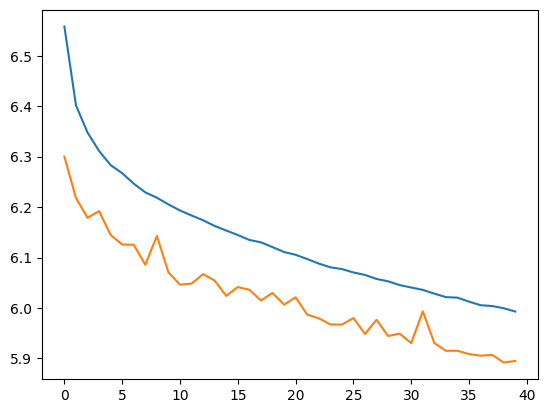

In [61]:
# validation_loss
# train_loss = [sum(x[1])/len(x[1]) for x in training_loss]
plt.plot(training_loss[:])
plt.plot(validation_loss[:])
plt.show()


In [14]:
# 保存模型
torch.save(model, 'Pnet_90.pth')

In [125]:
# load model
model_trained = torch.load('face_loc_r_48.pth')
model_trained.eval()  # 设置模型为评估/测试模式


RNet(
  (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(48, 64, kernel_size=(2, 2), stride=(1, 1))
  (linear1): Linear(in_features=576, out_features=128, bias=True)
  (face_det): Linear(in_features=128, out_features=2, bias=True)
  (bbox): Linear(in_features=128, out_features=4, bias=True)
  (landmark): Linear(in_features=128, out_features=10, bias=True)
)

In [126]:
aa = iter(test_loader)

In [133]:

a, b, c = next(aa)

In [134]:
def get_argsn(b):
    return [int(float(x)//1) for x in b]

def is_face(i):
    if i == "0":
        return "face"
    if i == "1":
        return "face"
    if i == "2":
        return "not face"
    if i == "3":
        return "not face"
    if i == "4":
        return "not face"
    if i == "5":
        return "face"

In [135]:
right = 0
total = 0
for i in range(128):

    #visualize_transformed_image(a[i],get_argsn(b[i]),get_argsn(b[i]))
    #print(is_face(c[i]))

    with torch.no_grad():
        face_det, bbox, landmark = model_trained(a[i].to(device))
    probabilities = torch.nn.functional.softmax(face_det, dim=1)
    # print(bbox)
    # print(landmark)
    print(probabilities)

    # if probabilities[0][0] > probabilities[0][1]:
    #     print("face")
    #     visualize_transformed_image(a[i],get_argsn(bbox[0]),get_argsn(landmark[0]))   
    # else:
    #     print("not face")
    #     visualize_transformed_image(a[i],[0,0,0,0],None)
    if probabilities[0][0] > 0.8 and is_face(c[i]) == "face":
        right += 1
    if probabilities[0][0] <= 0.2 and is_face(c[i]) == "not face":
        right += 1

    total += 1

print("total: {}".format(total))
print("right: {}".format(right))
print("accuracy: {}".format(right/128))

tensor([[0.2195, 0.7805]], device='cuda:0')
tensor([[0.0763, 0.9237]], device='cuda:0')
tensor([[0.9904, 0.0096]], device='cuda:0')
tensor([[0.9565, 0.0435]], device='cuda:0')
tensor([[0.1128, 0.8872]], device='cuda:0')
tensor([[0.9132, 0.0868]], device='cuda:0')
tensor([[0.0495, 0.9505]], device='cuda:0')
tensor([[0.9941, 0.0059]], device='cuda:0')
tensor([[0.9540, 0.0460]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.9477, 0.0523]], device='cuda:0')
tensor([[0.5705, 0.4295]], device='cuda:0')
tensor([[0.0867, 0.9133]], device='cuda:0')
tensor([[0.0132, 0.9868]], device='cuda:0')
tensor([[0.0058, 0.9942]], device='cuda:0')
tensor([[0.9909, 0.0091]], device='cuda:0')
tensor([[0.0097, 0.9903]], device='cuda:0')
tensor([[9.9956e-01, 4.4021e-04]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.0187, 0.9813]], device='cuda:0')
tensor([[0.9603, 0.0397]], device='cuda:0')
tensor([[0.9953, 0.0047]], device='cuda:0')
tensor([[0.1848, 0.8152]